# Προηγμένα Θέματα Αλγορίθμων

## Εισαγωγή στα OR-tools

Οι εργαστηριακές ασκήσεις έχουν ως στόχο να εξοικειωθείτε με την βιβλιοθήκη [OR-tools](https://developers.google.com/optimization) της Google και να εξασκηθείτε στην μοντελοποίηση προβλημάτων
ως Integer Programs.

Τα OR-tools είναι μια open source βιβλιοθήκη που παρέχει solvers για πολλά
προβλήματα ([π.χ.](https://developers.google.com/optimization/introduction/overview) Linear/Integer Programming, Constraint Optimization, Vehicle Routing κλπ) και χρησιμοποιείται αρκετά σε πολλά πρακτικά προβλήματα, όπως για παράδειγμα η βελτιστοποίηση των δρομολογίων μεταφορικών εταιριών ή η ανάθεση εργασιών σε servers στο AWS.

## Εγκατάσταση

Για την εγκατάσταση της βιβλιοθήκης ακολουθούμε τις οδηγίες που βρίσκονται [εδώ](https://developers.google.com/optimization/install). 
Για να εγκατασταθεί η βιβλιοθήκη μπορείτε να εκτελέσετε το επόμενο
κελί κώδικα. 

Προσέξτε ότι αν τρέχετε το notebook σε κάποιο cloud service (π.χ. Google Colab) πιθανώς να χρειαστεί ένα runtime restart
και θα πρέπει να τρέχετε την εντολή σε κάθε νέο jupyter που ανοίγετε.
Αν τρέχετε την άσκηση τοπικά, η βιβλιοθήκη θα εγκατασταθεί μια φορά και θα την έχετε για όλες τις εργασίες.

In [1]:
!pip install --upgrade --user ortools

## Linear Programming Solvers

Τα OR-tools μας παρέχουν πρόσβαση σε διάφορους open-source LP Solvers μέσα από το interface [MPSolver](https://developers.google.com/optimization/lp/mpsolver). Στο documentation της βιβλιοθήκης υπάρχει ένα εισαγωγικό [παράδειγμα](https://developers.google.com/optimization/lp/lp_example) που μας δείχνει
πως κάνουμε initialize τον solver και πως μπορούμε να προσθέσουμε
constraints και το objective. Ακόμα, υπάρχει ένα δεύτερο πιο προχωρημένο [παράδειγμα](https://developers.google.com/optimization/lp/stigler_diet) χρήσης, όπου λύνεται το Stigler's Diet.


Σε αυτό το section θα παρουσιάσουμε ένα εισαγωγικό παράδειγμα για να εξοικειωθούμε με την βιβλιοθήκη και στην συνέχεια θα λύσουμε
το πρόβλημα εύρεσης ενός Linear Classifier.

### LP Example

Έστω το ακόλουθο γραμμικό πρόγραμμα

\begin{align}
    \text{maximize} &\quad x+y \\
    &\\
    \text{subject to} &\quad y-5x \leq 0\\
    &\quad y+x-120 \leq 0\\ 
    &\\
    &\quad \frac{5}{7}x - y +\frac{120}{7} \leq 0
\end{align}


Σαν ένα εισαγωγικό παράδειγμα, θα βρούμε την βέλτιστη
λύση χρησιμοποιώντας τα or-tools

In [2]:
# Κάνουμε import και αρχικοποιούμε τον LP Solver
from ortools.linear_solver import pywraplp

solver = pywraplp.Solver.CreateSolver('GLOP')

# Ορίζουμε δύο μεταβλητές x και y οι οποίες παίρνουν θετικές τιμές
# Αντίστοιχα μπορείτε να βάλετε όποιο άνω και κάτω όριο θέλετε

x = solver.NumVar(0, solver.infinity(), 'x')
y = solver.NumVar(0, solver.infinity(), 'y')

# Με την συνάρτηση solver.NumVariables() βλέπουμε πόσες
# μεταβλητές έχουν οριστεί πάνω στο instance του solver
# με το οποίο δουλεύουμε

print('Number of variables =', solver.NumVariables())

Number of variables = 2


In [3]:
# Προσθέτουμε τα constraints του προβλήματος

solver.Add(y - 5*x <= 0)

solver.Add(y + x - 120 <= 0)

solver.Add(5/7 * x - y + 120/7 <= 0)

# Προσθέτουμε το objective 
# Αντίστοιχα με την minimize, μπορούμε να χρησιμοποιήσουμε και την maximize
solver.Maximize(x+y)

# Και τέλος, καλούμε την Solve
status = solver.Solve()

# Με την παρακάτω εντολή μπορούμε να θέσουμε και χρονικό
# όριο για την αναζήτηση της λύσης, δίνοντας τον χρόνο σε δευτερόλεπτα

solver.set_time_limit(15)

In [4]:
# Με το status ελέγχουμε αν έχει τελειώσει η αναζήτηση για την λύση
# Το status θα είναι ιδιαίτερα χρήσιμο στους Integer Programming solvers
# όπου η αναζήτηση παίρνει σημαντικά περισσότερο χρόνο και μπορεί να θέλουμε
# να σταματήσουμε νωρίτερα ή απλά μόλις βρεθεί μια feasible λύση

if status == pywraplp.Solver.OPTIMAL:
    # με το Objective().value() έχουμε πρόσβαση στην βέλτιστη τιμή του objective
    # ενώ με το .solution_value() σε κάποια μεταβλητή του solver, μπορούμε
    # να πάρουμε την τιμή της στην βέλτιστη λύση
    print('Solution:')
    print(f'Objective value = {solver.Objective().Value():.3f}')
    print(f'x = {x.solution_value():.3f}')
    print(f'y = {y.solution_value():.3f}')
else:
    print('The problem does not have an optimal solution.')

Solution:
Objective value = 120.000
x = 20.000
y = 100.000


### Finding a Linear Classifier as an LP program

Σε αυτό το παράδειγμα θα ασχοληθούμε με το θεμελιώδες πρόβλημα εκμάθησης ενός γραμμικού διαχωριστή. Στο συγκεκριμένο πρόβλημα,
θα μας δίνονται σημεία στο $\ \mathbb{R}^2$ και ένα label 
(στο $\{0,1\}$) για κάθε σημείο. Θεωρούμε ότι τα σημεία που μας
δίνονται θα είναι γραμμικά διαχωρίσιμα, δηλαδή θα υπάρχει μια ευθεία $h(x,y) = \alpha x + \beta y + \gamma\ $ για την οποία
όλα τα σημεία με label $0$ βρίσκονται στο ίδιο ημιεπίπεδο
και όλα τα σημεία με label $1$ πέφτουν στο άλλο ημιεπίπεδο
που ορίζει. Δηλαδή,


*   για κάθε σημείο $(x_1,y_1)$ με label $0$ θα ισχύει ότι $h(x_1,y_1) > 0$
*   για κάθε σημείο $(x_2,y_2)$ με label $1$ θα ισχύει ότι $h(x_2,y_2) < 0$

Τις περισσότερες φορές, για τα δεδομένα μας υπάρχουν αρκετές
τέτοιες ευθείες. Ωστόσο, μερικές από αυτές μπορεί να βρίσκονται
αρκετά κοντά στο σύνορο των δεδομένων και πιθανώς να κατηγοροποιήσουν λανθασμένα σημεία που θα έρθουν στο μέλλον.
Για τον λόγο αυτό, θέλουμε να διαλέξουμε την ευθεία που μεγιστοποιεί το περιθώριο μέχρι τα δεδομένα. Δηλαδή, θέλουμε
να βρούμε το μέγιστο $\ \delta$ ώστε να ισχύει:


*   για κάθε σημείο $(x_1,y_1)$ με label $0$ : $h(x_1,y_1) > \delta$
*   για κάθε σημείο $(x_2,y_2)$ με label $1$ : $h(x_2,y_2) < -\delta$

Το παραπάνω πρόβλημα εκφράζεται σαν ένα πρόβλημα Γραμμικού Προγραμματισμού όπου οι μεταβλητές είναι οι συντελεστές της ευθείας $\ \alpha, \beta, \gamma\ $ και το περιθώριο $\ \delta$.

\begin{align}
    \text{maximize} &\quad \delta &\\
    &\\
    \text{subject to} &\quad \alpha x_i + \beta y_i + \gamma \geq \delta & \forall\ \text{ positive point } (x_i,y_i) \\
    &\\
    &\quad \alpha x_i + \beta y_i + \gamma \leq -\delta & \forall\ \text{ negative point } (x_i,y_i) \\ 
\end{align}


Παρατηρείστε ότι αν έχουμε μια feasible λύση $\ (\alpha, \beta, \gamma, \delta)$ για το παραπάνω LP, τότε το και $\ c \cdot \ (\alpha, \beta, \gamma, \delta)$ είναι feasible λύση για κάθε $c > 0$. Επομένως, το παραπάνω πρόγραμμα θα είναι unbounded αφού μπορούμε
να αυξήσουμε το $\ \delta$ οσοδήποτε θέλουμε ενώ η λύση θα παραμένει η ίδια ευθεία. Για αυτό, θα προσθέσουμε και έναν περιορισμό για το 
$ \delta$, επιτρέποντάς του να πάρει τιμές μόνο στο $[0,1]$.

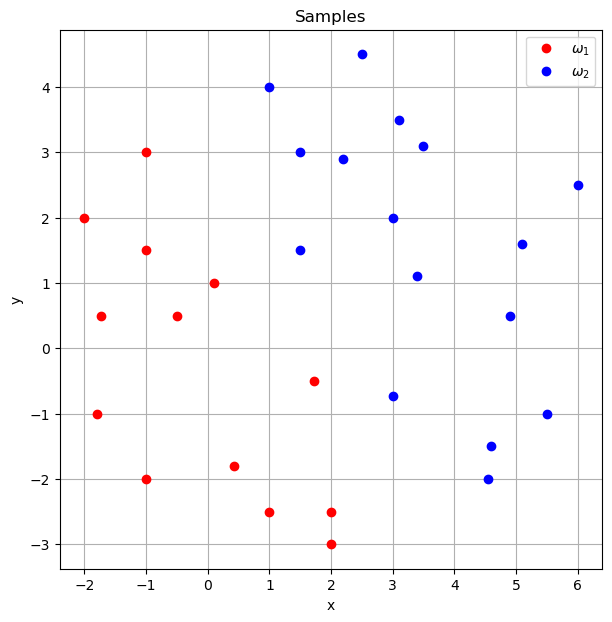

In [5]:
# Input example
import matplotlib.pyplot as plt

c1 = [ (-1,3), (-2,2), (-1,1.5), (-1.73,0.5), (-0.5,0.5), (0.1,1), (2,-3),
       (-1.8, -1), (-1,-2), (0.42, -1.8), (1,-2.5), (1.73, -0.5), (2,-2.5)]

c2 = [ (1,4), (2.5,4.5), (1.5,3), (2.2, 2.9), (3.1, 3.5), (3.5,3.1), (1.5,1.5), (3,2),
       (3.4,1.1), (4.9,0.5), (5.1, 1.6), (6,2.5), (3,-0.73), (4.55,-2), (4.6,-1.5), (5.5,-1)]

x_c1 = [a[0] for a in c1]
y_c1 = [a[1] for a in c1]

x_c2 = [a[0] for a in c2]
y_c2 = [a[1] for a in c2]

plt.figure(figsize=(7,7))
plt.plot(x_c1, y_c1, 'ro', label='$\omega_1$')
plt.plot(x_c2, y_c2, 'bo', label='$\omega_2$')
plt.title('Samples')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()


Θα υλοποιήσουμε μια συνάρτηση που δέχεται τα σημεία των δύο κλάσεων
και υπολογίζει τον βέλτιστο γραμμικό ταξινομητή χρησιμοποιώντας το
Linear Programm που παρουσιάσαμε.

In [6]:
'''
Parameters:
  - c1 : list of points that belong to class 1
  - c2 : list of points that belong to class 2

Returns:
  (a,b,c): a tuple with the coefficients of the linear classifier ax + by + c 
'''
def linear_classifier(c1, c2):
  solver = pywraplp.Solver.CreateSolver('GLOP')

  # Ορίζουμε τις μεταβλητές του LP
  infinity = solver.infinity()

  a = solver.NumVar(-infinity, infinity, 'alpha')
  b = solver.NumVar(-infinity, infinity, 'beta')
  c = solver.NumVar(-infinity, infinity, 'gamma')
  
  d = solver.NumVar(0, 1, 'delta')

  # Προσθέτουμε τους περιορισμούς για κάθε data point

  for (x,y) in c1:
    solver.Add(a*x + b*y + c  >= d)
  
  for (x,y) in c2:
    solver.Add(a*x + b*y + c  <= -d)
  
  # Ο στόχος μας είναι να μεγιστοποιήσουμε το περιθώριο d
  solver.Maximize(d)

  status = solver.Solve()

  if status == solver.OPTIMAL or status == solver.FEASIBLE:
    result = (a.solution_value(), b.solution_value(), c.solution_value())

    if result == (0,0,0):
      print('The two classes are not linearly seperable.')
      return None
    
    print(f'The linear classifier is the line {result[0]:.3f}x + {result[1]:.3f}y + {result[2]:.3f} = 0\n')
    return result
  
  return None
    


The linear classifier is the line -1.793x + -1.206y + 3.499 = 0



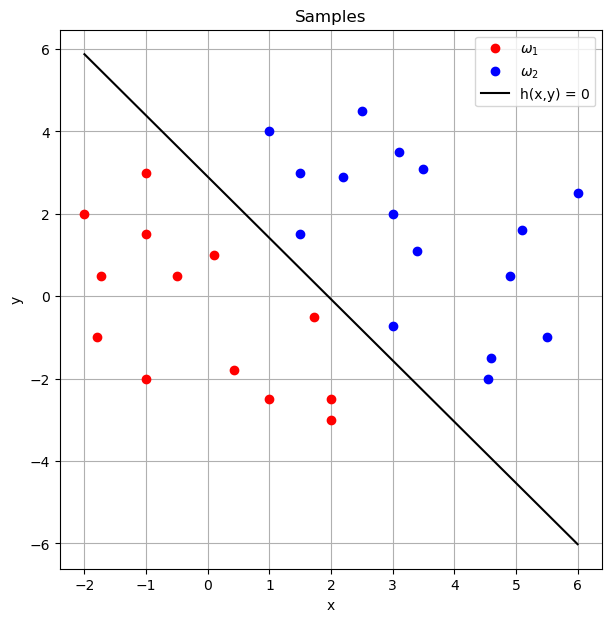

In [7]:
# Results

a,b,c = linear_classifier(c1, c2)

# Plot the linear classifier

# calculate y coordinate from x
h_y = lambda x: -1*(a*x+c)/b

min_x = min(min(x_c1), min(x_c2))
max_x = max(max(x_c1), max(x_c2))

plt.figure(figsize=(7,7))
plt.plot(x_c1, y_c1, 'ro', label='$\omega_1$')
plt.plot(x_c2, y_c2, 'bo', label='$\omega_2$')
plt.plot([min_x, max_x], [h_y(min_x), h_y(max_x)], 'black', label = 'h(x,y) = 0')
plt.title('Samples')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

## Integer Programming Solvers

### Solving Set Cover

Η πιο ενδιαφέρουσα περίπτωση, ωστόσο, είναι οι Integer Programming
solvers διότι μας δίνουν την δυνατότητα να λύσουμε μικρά instances
προβλημάτων τα οποία είναι NP-hard. Στο επόμενο παράδειγμα, θα λύσουμε το Set Cover.

Στο Set Cover, μας δίνεται ένα σύνολο $n$ στοιχείων, $\ \mathcal{U} = \{1,2,\dots,n\}$, και μια συλλογή υποσυνόλων του  $\ \mathcal{U}\ $, $\ \mathcal{S} = \{S_1, \dots, S_m\}$.

Στόχος μας είναι να διαλέξουμε τα λιγότερα δυνατά υποσύνολα $S_i$,
έτσι ώστε η ένωσή τους να είναι ίση με το $\ \mathcal{U}$

Το πρόβλημα αυτό μπορεί να γραφτεί ως ένα Integer Program. Ορίζουμε για κάθε σύνολο $S_i$, μια μεταβλητή $x_i\in\{0,1\}$
που θα παίρνει την τιμή $1$ αν διαλέγουμε το $S_i$ στην λύση μας
και $0$ διαφορετικά.

Ο μοναδικός περιορισμός που έχουμε είναι για κάθε στοιχείο του $\ \mathcal{U}$ να έχουμε πάρει
τουλάχιστον ένα σύνολο το οποίο περιέχει το στοιχείο αυτό.

Συνολικά, το Set Cover μοντελοποιείται ως εξής:


\begin{align}
    \text{minimize} &\quad \sum_{i=1}^m x_i &\\
    &\\
    \text{subject to} &\quad \sum_{i: j \in S_i} x_i \geq 1 & \forall j \in \mathcal{U}\\
    &\\
    &\quad x_i  \in \{0,1\} & \forall i \in [m]\\ 
\end{align}



In [8]:
from ortools.linear_solver import pywraplp

'''
Parameters:
  - n : the number of the elements in the universe U
  - S : a list of m lists containing numbers from 1 to n (inclusive)
        representing different subsets of U
example:

solve_set_cover(4, [ [1,2], [3,4], [1,2,4], [3] ])
'''
def solve_set_cover(n, S):
  
  # Αρχικοποιούμε τον MIP solver
  solver = pywraplp.Solver.CreateSolver('SCIP')

  # Δημιουργούμε ένα hashtable που για κάθε στοιχείο
  # του universe κρατάει μια λίστα με τα σύνολα που συμπεριλαμβάνουν
  # αυτό το στοιχείο

  m = len(S) # αριθμός υποσυνόλων

  sets = {}

  for u in range(n):
    sets[u] = []

  for i in range(m):
    for u in S[i]:
      sets[u].append(i)

  # Δημιουργούμε επίσης ένα πίνακα από μεταβλητές.
  # Το x[i] θα είναι μια ακέραια μεταβλητή που αντιστοιχεί
  # στο i-οστό υποσύνολο του U, το S[i].
  x = {}

  for i in range(m):
    x[i] = solver.IntVar(0, 1, f'S_{i}')
    # Η εντολή αυτή φτιάχνει μια νέα ακέραια μεταβλητή
    # με όρια το 0 και το 1
  
  print(f'Number of different subsets = {m}')
  print(f'Number of variables constructed = {solver.NumVariables()}')

  # Τώρα για κάθε στοιχείο του U, θέλουμε το άθροισμα των μεταβλητών
  # των συνόλων που το περιέχουν να είναι μεγαλύτερο ή ίσο του 1

  for j in range(n):
    # Για να αθροίσουμε ένα μη-σταθερό πλήθος μεταβλητών
    # μπορούμε να βάλουμε τις μεταβλητές σε μια λίστα
    # και να τις δώσουμε στην solver.Sum()
    solver.Add( solver.Sum([ x[i] for i in sets[j] ]) >= 1 )
  

  # Objective Function
  solver.Minimize(solver.Sum([x[i] for i in range(m)]))

  # Τώρα είμαστε έτοιμοι να καλέσουμε την solve.
  # Επειδή τα IP παίρνουν αρκετό χρόνο, είναι καλό να δίνουμε
  # και ένα time limit

  solver.set_time_limit(20) # 20 sec

  status = solver.Solve()

  # Στους Integer Programming Solvers δεν βρίσκουμε απαραίτητα την βέλτιστη λύση.
  # Επίσης, κάποιες φορές μπορεί να μας ενδιαφέρει απλά αν ο χώρος των λύσεων
  # είναι μη-κενός, δηλαδή αν υπάρχει feasible λύση.
  
  result = [] 

  if status == pywraplp.Solver.OPTIMAL or status == pywraplp.Solver.FEASIBLE:
    print('Total cost = ', solver.Objective().Value(), '\n')
    result = [i for i in range(m) if x[i].solution_value() > 0]

    print(f'Sets picked: {", ".join(list(map(str,result)))}')
  
  return result

Ας χρησιμοποιήσουμε την υλοποίησή μας για να επιλύσουμε το παρακάτω παράδειγμα:

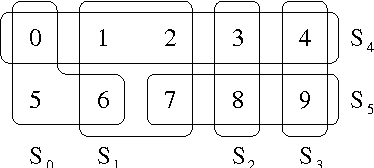

In [9]:
# Παράδειγμα εκτέλεσης

n = 10

S = [
     [0,5,6],         #S_0
     [1, 2, 6, 7],    #S_1
     [3, 8],          #S_2
     [4, 9],          #S_3
     [0, 1, 2, 3, 4], #S_4
     [7, 8, 9]        #S_5
]

_ = solve_set_cover(n,S)


W0000 00:00:1684575464.703508    6392 linear_solver.cc:644] Support for SCIP not linked in, or the license was not found.


AttributeError: 'NoneType' object has no attribute 'IntVar'